In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.model_selection import cross_val_score

from sklearn.utils import resample
plt.style.use('ggplot')




In [2]:
file_path = '../Final_Data_Set/Original Dataset with Outliers Included.csv'
df = pd.read_csv(file_path)
df.head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
0,80.0,0,1,25.19,6.6,140,0,-0.246527,-0.119227
1,54.0,0,0,27.32,6.6,80,0,-0.246527,-0.119227
2,28.0,0,0,27.32,5.7,158,0,-0.246527,0.150651
3,36.0,0,0,23.45,5.0,155,0,0.450465,-0.119227
4,76.0,1,1,20.14,4.8,155,0,0.450465,0.150651


<h1>SMOTE Oversampling</h1>

In [14]:
is_diabetic = df["diabetes"].value_counts()
print("Yes: ",is_diabetic[1])
print("No: ",is_diabetic[0])

Yes:  8500
No:  91482


In [4]:
#Copy of df before doing SMOTE oversampling
new_df = df.copy()

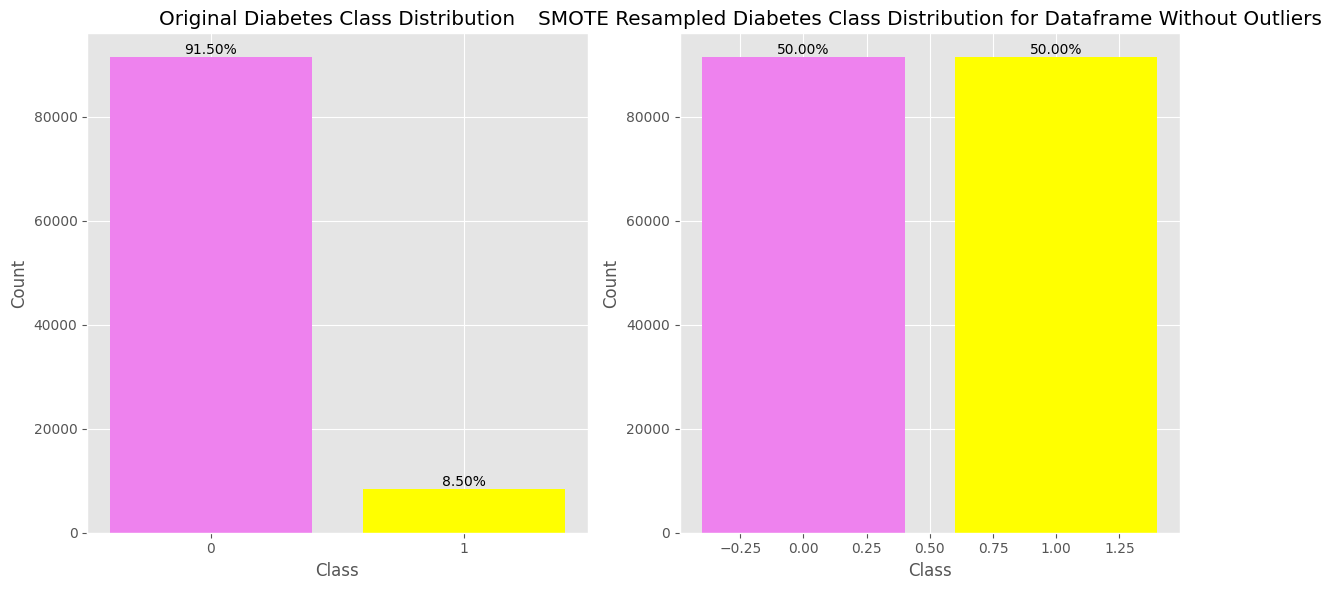

In [5]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = new_df.drop("diabetes", axis=1)
y = new_df["diabetes"]

# Initialize SMOTE

smote = SMOTE(random_state=424)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_resampled).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_resampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe Without Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [6]:
# Create a DataFrame from the SMOTE resampled data
df_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
df_resampled["diabetes"] = y_resampled

df_resampled_bisect = df_resampled.copy()
df_resampled_imp = df_resampled.copy()

<h1>KMeans Clustering<h1>

In [7]:
X = df_resampled.iloc[:, 0:8]
y = df_resampled.iloc[:, -1]

In [8]:
# Fit KMeans model
model=KMeans(n_clusters=4, n_init=10, random_state=424)
model.fit(X)

labels=model.labels_ + 1
labels  #clustering into 2 groups: 0 and 1

centers=model.cluster_centers_
centers

model.inertia_

X['clusters']=labels
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,clusters
0,80.0,0,1,25.190000,6.600000,140,-0.246527,-0.119227,2
1,54.0,0,0,27.320000,6.600000,80,-0.246527,-0.119227,3
2,28.0,0,0,27.320000,5.700000,158,-0.246527,0.150651,2
3,36.0,0,0,23.450000,5.000000,155,0.450465,-0.119227,2
4,76.0,1,1,20.140000,4.800000,155,0.450465,0.150651,2
...,...,...,...,...,...,...,...,...,...
182959,72.0,0,0,27.992175,6.760849,160,-0.246527,0.150651,2
182960,80.0,1,0,35.628573,6.100000,260,0.195045,-0.119227,1
182961,67.0,0,0,29.786139,6.134009,159,-0.154536,-0.083607,2
182962,54.0,0,0,28.054402,5.800000,145,0.255308,0.075086,2


<h1>Elbow Plot of KMeans Clustering<h1>

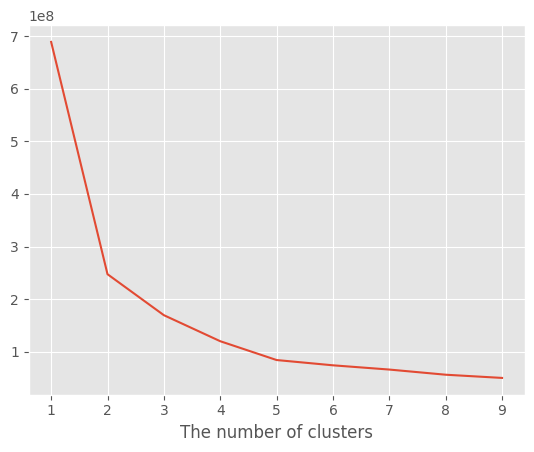

In [9]:
inertia_train={}
for n_cluster in range(1,10):
    model=KMeans(n_clusters=n_cluster, n_init=10)
    model.fit(X)
    inertia_train[n_cluster]=model.inertia_
    
plt.plot(range(1,10),inertia_train.values())
plt.xlabel('The number of clusters') #inertia is the measure of each dots to its centers: tight clusters, low inertia
plt.show()

In [10]:
# Assign the 'clusters' column to the original DataFrame
df_resampled['clusters'] = X['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
0,80.0,0,1,25.190000,6.600000,140,-0.246527,-0.119227,0,2
1,54.0,0,0,27.320000,6.600000,80,-0.246527,-0.119227,0,3
2,28.0,0,0,27.320000,5.700000,158,-0.246527,0.150651,0,2
3,36.0,0,0,23.450000,5.000000,155,0.450465,-0.119227,0,2
4,76.0,1,1,20.140000,4.800000,155,0.450465,0.150651,0,2
...,...,...,...,...,...,...,...,...,...,...
182959,72.0,0,0,27.992175,6.760849,160,-0.246527,0.150651,1,2
182960,80.0,1,0,35.628573,6.100000,260,0.195045,-0.119227,1,1
182961,67.0,0,0,29.786139,6.134009,159,-0.154536,-0.083607,1,2
182962,54.0,0,0,28.054402,5.800000,145,0.255308,0.075086,1,2


In [11]:
# Iterate over unique cluster values
for cluster_value in df_resampled['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx = df_resampled[df_resampled['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}'] = cluster_idx

In [12]:
cluster_2

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
0,80.000000,0,1,25.190000,6.600000,140,-0.246527,-0.119227,0,2
2,28.000000,0,0,27.320000,5.700000,158,-0.246527,0.150651,0,2
3,36.000000,0,0,23.450000,5.000000,155,0.450465,-0.119227,0,2
4,76.000000,1,1,20.140000,4.800000,155,0.450465,0.150651,0,2
8,42.000000,0,0,33.640000,4.800000,145,-0.246527,0.150651,0,2
...,...,...,...,...,...,...,...,...,...,...
182956,39.756151,0,0,37.200158,6.697539,155,0.280504,-0.119227,1,2
182957,64.001688,0,0,28.937266,6.200506,140,0.449289,-0.118771,1,2
182959,72.000000,0,0,27.992175,6.760849,160,-0.246527,0.150651,1,2
182961,67.000000,0,0,29.786139,6.134009,159,-0.154536,-0.083607,1,2


In [15]:
X_cluster_3 = cluster_3.drop('diabetes', axis=1)  # Features
X_cluster_3 = X_cluster_3.drop('clusters', axis = 1)
y_cluster_3 = cluster_3['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_3, X_test_cluster_3, y_train_cluster_3, y_test_cluster_3 = train_test_split(X_cluster_3, y_cluster_3, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_3 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3.fit(X_train_cluster_3, y_train_cluster_3)

# Make predictions on the test data
predictions_3 = logreg_3.predict(X_test_cluster_3)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_3, predictions_3)
classification_rep = classification_report(y_test_cluster_3, predictions_3)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [16]:
X_cluster_2 = cluster_2.drop('diabetes', axis=1)  # Features
X_cluster_2 = X_cluster_2.drop('clusters', axis = 1)
y_cluster_2 = cluster_2['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_2, X_test_cluster_2, y_train_cluster_2, y_test_cluster_2 = train_test_split(X_cluster_2, y_cluster_2, test_size=0.3, random_state=424)


In [17]:
X_cluster_4 = cluster_4.drop('diabetes', axis=1)  # Features
X_cluster_4 = X_cluster_4.drop('clusters', axis = 1)
y_cluster_4 = cluster_4['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_4, X_test_cluster_4, y_train_cluster_4, y_test_cluster_4 = train_test_split(X_cluster_4, y_cluster_4, test_size=0.4, random_state=424)

# Initialize the logistic regression model
logreg_4 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_4.fit(X_train_cluster_4, y_train_cluster_4)

# Make predictions on the test data
predictions_4 = logreg_4.predict(X_test_cluster_4)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_4, predictions_4)
classification_rep = classification_report(y_test_cluster_4, predictions_4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9242116909459709
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2816
           1       0.94      0.96      0.95      8030

    accuracy                           0.92     10846
   macro avg       0.91      0.89      0.90     10846
weighted avg       0.92      0.92      0.92     10846



c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
X_cluster_1 = cluster_1.drop('diabetes', axis=1)  # Features
X_cluster_1 = X_cluster_1.drop('clusters', axis = 1)
y_cluster_1 = cluster_1['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_1, X_test_cluster_1, y_train_cluster_1, y_test_cluster_1 = train_test_split(X_cluster_1, y_cluster_1, test_size=0.4, random_state=424)



In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Combine features and labels from all clusters
X_combined = np.concatenate((X_cluster_1, X_cluster_3, X_cluster_2, X_cluster_4), axis=0)
y_combined = np.concatenate((y_cluster_1, y_cluster_3, y_cluster_2, y_cluster_4), axis=0)

# Split the combined data into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [ ('cluster_3', logreg_3),('cluster_4', logreg_4)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined training set
voting_clf.fit(X_train_combined, y_train_combined)

# Make predictions using the ensemble model on the combined test set
ensemble_predictions = voting_clf.predict(X_test_combined)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined, ensemble_predictions)
# Calculate precision
precision_ensemble = precision_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate recall
recall_ensemble = recall_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate F1-score
f1_ensemble = f1_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate the AUC score
auc_ensemble = roc_auc_score(y_test_combined, ensemble_predictions)


classification_report_ensemble = classification_report(y_test_combined, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model f1: {f1_ensemble}")
print(f"Ensemble Model AUC ROC: {auc_ensemble}")
print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ensemble Model Accuracy: 0.8850792494079067
Ensemble Model Precision: 0.8850792350071848
Ensemble Model Recall: 0.8850792494079067
Ensemble Model f1: 0.8850792375073449
Ensemble Model AUC ROC: 0.8850789422938319
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     27408
           1       0.89      0.89      0.89     27482

    accuracy                           0.89     54890
   macro avg       0.89      0.89      0.89     54890
weighted avg       0.89      0.89      0.89     54890



<h1>Random Forests model on clusters<h1>

In [20]:
# Create and train the first Random Forest model
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model1.fit(X_train_cluster_1, y_train_cluster_1)


# Make predictions using the first Random Forest model
y_pred_rf1 = rf_model1.predict(X_test_cluster_1)


# Calculate accuracy for the first Random Forest model
accuracy_rf1 = accuracy_score(y_test_cluster_1, y_pred_rf1)
print("Random Forest Model 1 Accuracy:", accuracy_rf1)

classification_rep = classification_report(y_test_cluster_1, y_pred_rf1)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model1, X_train_cluster_1, y_train_cluster_1, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())





Random Forest Model 1 Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8831

    accuracy                           1.00      8831
   macro avg       1.00      1.00      1.00      8831
weighted avg       1.00      1.00      1.00      8831

Cross-validated Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-validated Accuracy: 1.0


In [21]:
# Create and train the first Random Forest model
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model2.fit(X_train_cluster_2, y_train_cluster_2)


# Make predictions using the first Random Forest model
y_pred_rf2 = rf_model2.predict(X_test_cluster_2)


# Calculate accuracy for the first Random Forest model
accuracy_rf2 = accuracy_score(y_test_cluster_2, y_pred_rf2)
print("Random Forest Model 1 Accuracy:", accuracy_rf2)

classification_rep = classification_report(y_test_cluster_2, y_pred_rf2)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model2, X_train_cluster_2, y_train_cluster_2, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())




Random Forest Model 1 Accuracy: 0.9663300725781003
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17013
           1       0.97      0.95      0.96     14677

    accuracy                           0.97     31690
   macro avg       0.97      0.97      0.97     31690
weighted avg       0.97      0.97      0.97     31690

Cross-validated Accuracy Scores: [0.96558253 0.96389208 0.96388964 0.96645929 0.96416013]
Mean Cross-validated Accuracy: 0.9647967341816404


In [ ]:
# Create and train the first Random Forest model
rf_model3 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model3.fit(X_train_cluster_3, y_train_cluster_3)

# Make predictions using the first Random Forest model
y_pred_rf3 = rf_model3.predict(X_test_cluster_3)

# Calculate accuracy for the first Random Forest model
accuracy_rf3 = accuracy_score(y_test_cluster_3, y_pred_rf3)
print("Random Forest Model 3 Accuracy:", accuracy_rf3)

classification_rep = classification_report(y_test_cluster_3, y_pred_rf3)

print("Classification Report:")
print(classification_rep)






Random Forest Model 3 Accuracy: 0.9816840811309158
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2090
           1       0.99      0.99      0.99      6045

    accuracy                           0.98      8135
   macro avg       0.98      0.98      0.98      8135
weighted avg       0.98      0.98      0.98      8135



In [ ]:
# Create and train the first Random Forest model
rf_model4 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model4.fit(X_train_cluster_4, y_train_cluster_4)

# Make predictions using the first Random Forest model
y_pred_rf4 = rf_model4.predict(X_test_cluster_4)

# Calculate accuracy for the first Random Forest model
accuracy_rf4 = accuracy_score(y_test_cluster_4, y_pred_rf4)
print("Random Forest Model 4 Accuracy:", accuracy_rf4)

classification_rep = classification_report(y_test_cluster_4, y_pred_rf4)

print("Classification Report:")
print(classification_rep)



Random Forest Model 4 Accuracy: 0.9647362317468582
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22609
           1       0.97      0.95      0.96     19644

    accuracy                           0.96     42253
   macro avg       0.97      0.96      0.96     42253
weighted avg       0.96      0.96      0.96     42253



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_combined_rf = np.concatenate((X_cluster_1, X_cluster_2, X_cluster_3, X_cluster_4), axis=0)
y_combined_rf = np.concatenate((y_cluster_1, y_cluster_2, y_cluster_3, y_cluster_4), axis=0)

# Split the combined_rf data into training and test sets
X_train_combined_rf, X_test_combined_rf, y_train_combined_rf, y_test_combined_rf = train_test_split(X_combined_rf, y_combined_rf, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1', rf_model1), ('cluster_2', rf_model2), ('cluster_3', rf_model3), ('cluster_4', rf_model4)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf, y_train_combined_rf)

# Make predictions using the ensemble model on the combined_rf test set
ensemble_predictions = voting_clf.predict(X_test_combined_rf)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_rf, ensemble_predictions)


# Calculate precision
precision_ensemble = precision_score(y_test_combined_rf, ensemble_predictions, average='weighted')

# Calculate recall
recall_ensemble = recall_score(y_test_combined_rf, ensemble_predictions, average='weighted')

# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_rf, ensemble_predictions, average='weighted')


classification_report_ensemble = classification_report(y_test_combined_rf, ensemble_predictions)


print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")


print("Ensemble Model Classification Report:")
print(classification_report_ensemble)



Ensemble Model Accuracy: 0.9790854436145018
Ensemble Model Precision: 0.9792492074838272
Ensemble Model Recall: 0.9790854436145018
Ensemble Model F1-score: 0.9790841017856984
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27383
           1       0.99      0.97      0.98     27507

    accuracy                           0.98     54890
   macro avg       0.98      0.98      0.98     54890
weighted avg       0.98      0.98      0.98     54890



In [ ]:
from sklearn.metrics import roc_auc_score

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf, y_train_combined_rf)

# Initialize an empty array to store the predicted probabilities
ensemble_probabilities = np.zeros((len(X_test_combined_rf), 2))  # Assuming binary classification

# Iterate over individual models in the ensemble
for estimator in voting_clf.estimators_:
    # Calculate the predicted probabilities for each class
    class_probabilities = estimator.predict_proba(X_test_combined_rf)
    # Aggregate the predicted probabilities
    ensemble_probabilities += class_probabilities

# Take the average of the predicted probabilities
ensemble_probabilities /= len(voting_clf.estimators_)

# Extract the probabilities for the positive class (assuming binary classification)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Now you can use positive_class_probabilities for further analysis, such as calculating AUC-ROC
# Calculate AUC-ROC
auc = roc_auc_score(y_test_combined_rf, positive_class_probabilities)

print(f"Ensemble Model AUC-ROC: {auc}")




Ensemble Model AUC-ROC: 0.9975730837563219


<h1>EDA on clusters<h1>

In [ ]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Create a new column 'bmi/age' by dividing 'bmi' by 'age'
df_resampled['bmi/age'] = df_resampled['bmi'] / df_resampled['age']

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled, x='age', y='bmi', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



In [ ]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='HbA1c_level', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

<h1> Bisecting KMeans <h1>

In [ ]:
df_resampled_bisect 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,80.0,0,1,25.190000,6.600000,140,-0.246527,-0.119227,0
1,54.0,0,0,27.320000,6.600000,80,-0.246527,-0.119227,0
2,28.0,0,0,27.320000,5.700000,158,-0.246527,0.150651,0
3,36.0,0,0,23.450000,5.000000,155,0.450465,-0.119227,0
4,76.0,1,1,20.140000,4.800000,155,0.450465,0.150651,0
...,...,...,...,...,...,...,...,...,...
182959,72.0,0,0,27.992175,6.760849,160,-0.246527,0.150651,1
182960,80.0,1,0,35.628573,6.100000,260,0.195045,-0.119227,1
182961,67.0,0,0,29.786139,6.134009,159,-0.154536,-0.083607,1
182962,54.0,0,0,28.054402,5.800000,145,0.255308,0.075086,1


In [ ]:
X_bisect = df_resampled_bisect.iloc[:, 0:8]
y_bisect = df_resampled_bisect.iloc[:, -1]


# Instantiate BisectingKMeans with desired number of clusters
bkm = BisectingKMeans(n_clusters=4, random_state=424)

# Fit the model to the data
bkm.fit(X_bisect)



# Predict the clusters for the data points
labels = bkm.predict(X_bisect) + 1

# Print the cluster centers
print("Cluster centers:")
print(bkm.cluster_centers_)

X_bisect['clusters']=labels
X_bisect

Cluster centers:
[[ 6.09532716e+01  9.42156996e-02  5.30869230e-02  3.21452023e+01
   6.88525649e+00  2.80333379e+02  5.84193242e-02  8.02491148e-03]
 [ 5.61504749e+01  9.16098101e-02  4.51041859e-02  3.04558673e+01
   6.50616892e+00  2.14659635e+02  2.13627938e-02  5.84816204e-03]
 [ 4.96738895e+01  7.78362617e-02  3.82838534e-02  2.92836570e+01
   6.09513281e+00  1.45829133e+02 -2.94594479e-03 -1.33509985e-03]
 [ 4.01346297e+01  5.78180526e-02  3.08102345e-02  2.68863845e+01
   5.40127221e+00  8.87455579e+01 -5.32072922e-02 -8.78215928e-03]]


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,clusters
0,80.0,0,1,25.190000,6.600000,140,-0.246527,-0.119227,3
1,54.0,0,0,27.320000,6.600000,80,-0.246527,-0.119227,4
2,28.0,0,0,27.320000,5.700000,158,-0.246527,0.150651,3
3,36.0,0,0,23.450000,5.000000,155,0.450465,-0.119227,3
4,76.0,1,1,20.140000,4.800000,155,0.450465,0.150651,3
...,...,...,...,...,...,...,...,...,...
182959,72.0,0,0,27.992175,6.760849,160,-0.246527,0.150651,3
182960,80.0,1,0,35.628573,6.100000,260,0.195045,-0.119227,1
182961,67.0,0,0,29.786139,6.134009,159,-0.154536,-0.083607,3
182962,54.0,0,0,28.054402,5.800000,145,0.255308,0.075086,3


In [ ]:
# Assign the 'clusters' column to the original DataFrame
df_resampled_bisect['clusters'] = X_bisect['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled_bisect

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
0,80.0,0,1,25.190000,6.600000,140,-0.246527,-0.119227,0,3
1,54.0,0,0,27.320000,6.600000,80,-0.246527,-0.119227,0,4
2,28.0,0,0,27.320000,5.700000,158,-0.246527,0.150651,0,3
3,36.0,0,0,23.450000,5.000000,155,0.450465,-0.119227,0,3
4,76.0,1,1,20.140000,4.800000,155,0.450465,0.150651,0,3
...,...,...,...,...,...,...,...,...,...,...
182959,72.0,0,0,27.992175,6.760849,160,-0.246527,0.150651,1,3
182960,80.0,1,0,35.628573,6.100000,260,0.195045,-0.119227,1,1
182961,67.0,0,0,29.786139,6.134009,159,-0.154536,-0.083607,1,3
182962,54.0,0,0,28.054402,5.800000,145,0.255308,0.075086,1,3


<h1> Logistic Prediction on bisect Cluster groups <h1>

In [ ]:
# Iterate over unique cluster values
for cluster_value in df_resampled_bisect['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx_bisect = df_resampled_bisect[df_resampled_bisect['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}_bisect'] = cluster_idx_bisect

In [ ]:
cluster_2_bisect

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
6,44.00000,0,0,19.310000,6.500000,200,-0.246527,-0.119227,1,2
13,67.00000,0,0,25.690000,5.800000,200,-0.246527,-0.119227,0,2
16,15.00000,0,0,30.360000,6.100000,200,-0.246527,0.150651,0,2
26,67.00000,0,1,27.320000,6.500000,200,0.450465,0.150651,1,2
30,53.00000,0,0,31.750000,4.000000,200,-0.246527,-0.119227,0,2
...,...,...,...,...,...,...,...,...,...,...
182937,66.00000,0,0,39.835955,6.022884,200,0.450465,0.150651,1,2
182951,52.09989,0,0,36.171932,7.119867,220,0.450465,0.123693,1,2
182955,65.08052,0,0,44.669844,6.877403,200,-0.246527,0.150651,1,2
182958,80.00000,0,0,27.320000,9.000000,240,-0.246527,0.150651,1,2


In [ ]:
X_cluster_3_bisect = cluster_3_bisect.drop('diabetes', axis=1)  # Features
X_cluster_3_bisect = X_cluster_3_bisect.drop('clusters', axis = 1)
y_cluster_3_bisect = cluster_3_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_3_bisect, X_test_cluster_3_bisect, y_train_cluster_3_bisect, y_test_cluster_3_bisect = train_test_split(X_cluster_3_bisect, y_cluster_3_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_3_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3_bisect.fit(X_train_cluster_3_bisect, y_train_cluster_3_bisect)

# Make predictions on the test data
predictions_3_bisect = logreg_3_bisect.predict(X_test_cluster_3_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_3_bisect, predictions_3_bisect)
classification_rep = classification_report(y_test_cluster_3_bisect, predictions_3_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8370463868728305
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     17013
           1       0.81      0.84      0.83     14677

    accuracy                           0.84     31690
   macro avg       0.84      0.84      0.84     31690
weighted avg       0.84      0.84      0.84     31690



/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_cluster_2_bisect = cluster_2_bisect.drop('diabetes', axis=1)  # Features
X_cluster_2_bisect = X_cluster_2_bisect.drop('clusters', axis = 1)
y_cluster_2_bisect = cluster_2_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_2_bisect, X_test_cluster_2_bisect, y_train_cluster_2_bisect, y_test_cluster_2_bisect = train_test_split(X_cluster_2_bisect, y_cluster_2_bisect, test_size=0.3, random_state=222)

# Initialize the logistic regression model
logreg_2_bisect = LogisticRegression(random_state=222)

# Fit the model on the training data
logreg_2_bisect.fit(X_train_cluster_2_bisect, y_train_cluster_2_bisect)

# Make predictions on the test data
predictions_2_bisect = logreg_2_bisect.predict(X_test_cluster_2_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_2_bisect, predictions_2_bisect)
classification_rep = classification_report(y_test_cluster_2_bisect, predictions_2_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9124769514443761
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2071
           1       0.93      0.96      0.94      6064

    accuracy                           0.91      8135
   macro avg       0.90      0.87      0.88      8135
weighted avg       0.91      0.91      0.91      8135



/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_cluster_1_bisect = cluster_1_bisect.drop('diabetes', axis=1)  # Features
X_cluster_1_bisect = X_cluster_1_bisect.drop('clusters', axis = 1)
y_cluster_1_bisect = cluster_1_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_1_bisect, X_test_cluster_1_bisect, y_train_cluster_1_bisect, y_test_cluster_1_bisect = train_test_split(X_cluster_1_bisect, y_cluster_1_bisect, test_size=0.3, random_state=222)



In [ ]:
X_cluster_4_bisect = cluster_4_bisect.drop('diabetes', axis=1)  # Features
X_cluster_4_bisect = X_cluster_4_bisect.drop('clusters', axis = 1)
y_cluster_4_bisect = cluster_4_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_4_bisect, X_test_cluster_4_bisect, y_train_cluster_4_bisect, y_test_cluster_4_bisect = train_test_split(X_cluster_4_bisect, y_cluster_4_bisect, test_size=0.3, random_state=222)


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_bisect_combined = np.concatenate((X_cluster_1_bisect, X_cluster_3_bisect, X_cluster_2_bisect, X_cluster_4_bisect), axis=0)
y_bisect_combined = np.concatenate((y_cluster_1_bisect, y_cluster_3_bisect, y_cluster_2_bisect, y_cluster_4_bisect), axis=0)

# Split the bisect_combined data into training and test sets
X_train_bisect_combined, X_test_bisect_combined, y_train_bisect_combined, y_test_bisect_combined = train_test_split(X_bisect_combined, y_bisect_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_2_bisect', logreg_2_bisect), ('cluster_3_bisect', logreg_3_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_bisect_combined, y_train_bisect_combined)

# Make predictions using the ensemble model on the bisect_combined test set
ensemble_predictions_bisect = voting_clf.predict(X_test_bisect_combined)

# Evaluate the ensemble model
accuracy_ensemble_bisect = accuracy_score(y_test_bisect_combined, ensemble_predictions)

# Calculate precision
precision_ensemble_bisect = precision_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

# Calculate recall
recall_ensemble_bisect = recall_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

# Calculate F1-score
f1_ensemble_bisect = f1_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')


classification_report_ensemble_bisect = classification_report(y_test_bisect_combined, ensemble_predictions_bisect)

print(f"Ensemble Bisect Model Accuracy: {accuracy_ensemble_bisect}")
print(f"Ensemble Bisect Model Precision: {precision_ensemble_bisect}")
print(f"Ensemble Bisect Model Recall: {recall_ensemble_bisect}")
print(f"Ensemble Bisect Model F1-score: {f1_ensemble_bisect}")


print("Ensemble Bisect Model Classification Report:")
print(classification_report_ensemble_bisect)

Ensemble Bisect Model Accuracy: 0.47666241574057205
Ensemble Bisect Model Precision: 0.8865058399670439
Ensemble Bisect Model Recall: 0.8864820550191291
Ensemble Bisect Model F1-score: 0.8864765701928446
Ensemble Bisect Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     27267
           1       0.88      0.89      0.89     27623

    accuracy                           0.89     54890
   macro avg       0.89      0.89      0.89     54890
weighted avg       0.89      0.89      0.89     54890



In [ ]:
from sklearn.metrics import roc_auc_score
# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='soft')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_bisect_combined, y_train_bisect_combined)


# Calculate predicted probabilities for each class
ensemble_probabilities = voting_clf.predict_proba(X_test_bisect_combined)

# Extract the predicted probabilities for the positive class (class 1)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test_bisect_combined, positive_class_probabilities)

print(f"AUC-ROC Score: {auc_roc}")


AUC-ROC Score: 0.9631269955943667


<h1>Random Forests model on bisect clusters<h1>

In [ ]:
# Split the data into training and test sets
X_train_cluster_1_bisect, X_test_cluster_1_bisect, y_train_cluster_1_bisect, y_test_cluster_1_bisect = train_test_split(X_cluster_1_bisect, y_cluster_1_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model1_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model1_bisect.fit(X_train_cluster_1_bisect, y_train_cluster_1_bisect)


# Make predictions using the first Random Forest model
y_pred_rf1_bisect = rf_model1_bisect.predict(X_test_cluster_1_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf1_bisect = accuracy_score(y_test_cluster_1_bisect, y_pred_rf1_bisect)
print("Random Forest Model 1 Bisect Accuracy:", accuracy_rf1_bisect)

classification_rep = classification_report(y_test_cluster_1_bisect, y_pred_rf1_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model1_bisect, X_train_cluster_1_bisect, y_train_cluster_1_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())



Random Forest Model 1 Bisect Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6624

    accuracy                           1.00      6624
   macro avg       1.00      1.00      1.00      6624
weighted avg       1.00      1.00      1.00      6624

Cross-validated Biscet Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-validated Bisect Accuracy: 1.0


In [ ]:
# Split the data into training and test sets
X_train_cluster_2_bisect, X_test_cluster_2_bisect, y_train_cluster_2_bisect, y_test_cluster_2_bisect = train_test_split(X_cluster_2_bisect, y_cluster_2_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model2_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model2_bisect.fit(X_train_cluster_2_bisect, y_train_cluster_2_bisect)


# Make predictions using the first Random Forest model
y_pred_rf2_bisect = rf_model2_bisect.predict(X_test_cluster_2_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf2_bisect = accuracy_score(y_test_cluster_2_bisect, y_pred_rf2_bisect)
print("Random Forest Model 2 Bisect Accuracy:", accuracy_rf2_bisect)

classification_rep = classification_report(y_test_cluster_2_bisect, y_pred_rf2_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model2_bisect, X_train_cluster_2_bisect, y_train_cluster_2_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())



Random Forest Model 2 Bisect Accuracy: 0.9816840811309158
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2090
           1       0.99      0.99      0.99      6045

    accuracy                           0.98      8135
   macro avg       0.98      0.98      0.98      8135
weighted avg       0.98      0.98      0.98      8135

Cross-validated Biscet Accuracy Scores: [0.97550053 0.98261328 0.9768177  0.97918862 0.98155954]
Mean Cross-validated Bisect Accuracy: 0.9791359325605902


In [ ]:
# Split the data into training and test sets
X_train_cluster_3_bisect, X_test_cluster_3_bisect, y_train_cluster_3_bisect, y_test_cluster_3_bisect = train_test_split(X_cluster_3_bisect, y_cluster_3_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model3_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model3_bisect.fit(X_train_cluster_3_bisect, y_train_cluster_3_bisect)


# Make predictions using the first Random Forest model
y_pred_rf3_bisect = rf_model3_bisect.predict(X_test_cluster_3_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf3_bisect = accuracy_score(y_test_cluster_3_bisect, y_pred_rf3_bisect)
print("Random Forest Model 3 Bisect Accuracy:", accuracy_rf3_bisect)

classification_rep = classification_report(y_test_cluster_3_bisect, y_pred_rf3_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model3_bisect, X_train_cluster_3_bisect, y_train_cluster_3_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())





Random Forest Model 3 Bisect Accuracy: 0.9659829599242663
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17013
           1       0.97      0.95      0.96     14677

    accuracy                           0.97     31690
   macro avg       0.97      0.97      0.97     31690
weighted avg       0.97      0.97      0.97     31690

Cross-validated Biscet Accuracy Scores: [0.96450064 0.96362161 0.96416013 0.96693265 0.96443062]
Mean Cross-validated Bisect Accuracy: 0.96472913007502


In [ ]:
# Split the data into training and test sets
X_train_cluster_4_bisect, X_test_cluster_4_bisect, y_train_cluster_4_bisect, y_test_cluster_4_bisect = train_test_split(X_cluster_4_bisect, y_cluster_4_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model4_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model4_bisect.fit(X_train_cluster_4_bisect, y_train_cluster_4_bisect)


# Make predictions using the first Random Forest model
y_pred_rf4_bisect = rf_model4_bisect.predict(X_test_cluster_4_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf4_bisect = accuracy_score(y_test_cluster_4_bisect, y_pred_rf4_bisect)
print("Random Forest Model 4 Bisect Accuracy:", accuracy_rf4_bisect)

classification_rep = classification_report(y_test_cluster_4_bisect, y_pred_rf4_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model4_bisect, X_train_cluster_4_bisect, y_train_cluster_4_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())





Random Forest Model 4 Bisect Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8442

    accuracy                           1.00      8442
   macro avg       1.00      1.00      1.00      8442
weighted avg       1.00      1.00      1.00      8442

Cross-validated Biscet Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-validated Bisect Accuracy: 1.0


In [ ]:
# Combine features and labels from all clusters
X_bisect_combined_rf = np.concatenate((X_cluster_1_bisect, X_cluster_2_bisect, X_cluster_3_bisect, X_cluster_4_bisect), axis=0)
y_bisect_combined_rf = np.concatenate((y_cluster_1_bisect, y_cluster_2_bisect, y_cluster_3_bisect, y_cluster_4_bisect), axis=0)

# Split the combined_rf data into training and test sets
X_train_combined_rf_bisect, X_test_combined_rf_bisect, y_train_combined_rf_bisect, y_test_combined_rf_bisect = train_test_split(X_bisect_combined_rf, y_bisect_combined_rf, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1_bisect', rf_model1_bisect), ('cluster_2_bisect', rf_model2_bisect), ('cluster_3_bisect', rf_model3_bisect), ('cluster_4_bisect', rf_model4_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf_bisect, y_train_combined_rf_bisect)

# Make predictions using the ensemble model on the combined_rf test set
ensemble_predictions = voting_clf.predict(X_test_combined_rf_bisect)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_rf_bisect, ensemble_predictions)

# Calculate precision
precision_ensemble = precision_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

# Calculate recall
recall_ensemble = recall_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

classification_report_ensemble = classification_report(y_test_combined_rf_bisect, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")


print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

Ensemble Model Accuracy: 0.9790672253598105
Ensemble Model Precision: 0.9791922609681435
Ensemble Model Recall: 0.9790672253598105
Ensemble Model F1-score: 0.9790665359638391
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27337
           1       0.99      0.97      0.98     27553

    accuracy                           0.98     54890
   macro avg       0.98      0.98      0.98     54890
weighted avg       0.98      0.98      0.98     54890



In [ ]:
from sklearn.metrics import roc_auc_score

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf_bisect, y_train_combined_rf_bisect)

# Initialize an empty array to store the predicted probabilities
ensemble_probabilities = np.zeros((len(X_test_combined_rf_bisect), 2))  # Assuming binary classification

# Iterate over individual models in the ensemble
for estimator in voting_clf.estimators_:
    # Calculate the predicted probabilities for each class
    class_probabilities = estimator.predict_proba(X_test_combined_rf_bisect)
    # Aggregate the predicted probabilities
    ensemble_probabilities += class_probabilities

# Take the average of the predicted probabilities
ensemble_probabilities /= len(voting_clf.estimators_)

# Extract the probabilities for the positive class (assuming binary classification)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Now you can use positive_class_probabilities for further analysis, such as calculating AUC-ROC
# Calculate AUC-ROC
auc = roc_auc_score(y_test_combined_rf_bisect, positive_class_probabilities)

print(f"Ensemble Model AUC-ROC: {auc}")





Ensemble Model AUC-ROC: 0.9976248179239962


<h1>EDA on bisect clusters<h1>

In [ ]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Create a new column 'bmi/age' by dividing 'bmi' by 'age'
df_resampled_bisect['bmi/age'] = df_resampled_bisect['bmi'] / df_resampled_bisect['age']

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_bisect, x='age', y='bmi', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()




In [ ]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='HbA1c_level', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

<h1> Features Importance Incorporated <h1>

<h1>K-Means Important Clustering <h1>

In [ ]:
columns_to_drop = ["hypertension", "heart_disease", "smoking_history_encoded", "gender_encoded"]
df_resampled_imp = df_resampled.copy()
df_resampled_imp = df_resampled_imp.drop(columns=columns_to_drop)

df_important_bisect = df_resampled_imp.copy()

In [ ]:
X_important = df_resampled_imp.iloc[:, 0:4]
y = df_resampled_imp.iloc[:, -1]

In [ ]:
# Fit KMeans model
model=KMeans(n_clusters=4, n_init=10, random_state=424)
model.fit(X_important)

labels=model.labels_ + 1
labels  #clustering into 2 groups: 0 and 1

centers=model.cluster_centers_
centers

model.inertia_

X_important['clusters']=labels
X_important

In [ ]:
inertia_train={}
for n_cluster in range(1,10):
    model=KMeans(n_clusters=n_cluster, n_init=10, random_state =424)
    model.fit(X_important)
    inertia_train[n_cluster]=model.inertia_
    
plt.plot(range(1,10),inertia_train.values())
plt.xlabel('The number of clusters with important') #inertia is the measure of each dots to its centers: tight clusters, low inertia
plt.show()

In [ ]:
# Assign the 'clusters' column to the original DataFrame
df_resampled_imp['clusters'] = X_important['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled_imp

In [ ]:
important_1 = df_resampled_imp[df_resampled_imp["clusters"] == 1]
important_2 = df_resampled_imp[df_resampled_imp["clusters"] == 2]
important_3 = df_resampled_imp[df_resampled_imp["clusters"] == 3]
important_4 = df_resampled_imp[df_resampled_imp["clusters"] == 4]

In [ ]:
X_important_3 = important_3.drop('diabetes', axis=1)  # Features
X_important_3 = X_important_3.drop('clusters', axis = 1)
y_important_3 = important_3['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_3, X_test_important_3, y_train_important_3, y_test_important_3 = train_test_split(X_important_3, y_important_3, test_size=0.1, random_state=424)

# Initialize the logistic regression model
logreg_3 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3.fit(X_train_important_3, y_train_important_3)

# Make predictions on the test data
predictions_3 = logreg_3.predict(X_test_important_3)

# Evaluate the model
accuracy = accuracy_score(y_test_important_3, predictions_3)
classification_rep = classification_report(y_test_important_3, predictions_3)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_important_2 = important_2.drop('diabetes', axis=1)  # Features
X_important_2 = X_important_2.drop('clusters', axis = 1)
y_important_2 = important_2['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_2, X_test_important_2, y_train_important_2, y_test_important_2 = train_test_split(X_important_2, y_important_2, test_size=0.1, random_state=222)

# Initialize the logistic regression model
logreg_2 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2.fit(X_train_important_2, y_train_important_2)

# Make predictions on the test data
predictions_2 = logreg_2.predict(X_test_important_2)

# Evaluate the model
accuracy = accuracy_score(y_test_important_2, predictions_2)
classification_rep = classification_report(y_test_important_2, predictions_2)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_important_1 = important_1.drop('diabetes', axis=1)  # Features
X_important_1 = X_important_1.drop('clusters', axis = 1)
y_important_1 = important_1['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_1, X_test_important_1, y_train_important_1, y_test_important_1 = train_test_split(X_important_1, y_important_1, test_size=0.1, random_state=222)



In [ ]:
X_important_4 = important_4.drop('diabetes', axis=1)  # Features
X_important_4 = X_important_4.drop('clusters', axis = 1)
y_important_4 = important_4['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_4, X_test_important_4, y_train_important_4, y_test_important_4 = train_test_split(X_important_4, y_important_4, test_size=0.1, random_state=222)



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Combine features and labels from all importants
X_combined_important = np.concatenate((X_important_1, X_important_3, X_important_2, X_important_4), axis=0)
y_combined_important = np.concatenate((y_important_1, y_important_3, y_important_2, y_important_4), axis=0)

# Split the combined_important data into training and test sets
X_train_combined_important, X_test_combined_important, y_train_combined_important, y_test_combined_important = train_test_split(X_combined_important, y_combined_important, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [ ('important_3', logreg_3), ('important_2', logreg_2), ('important_4', logreg_4)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_important training set
voting_clf.fit(X_train_combined_important, y_train_combined_important)

# Make predictions using the ensemble model on the combined_important test set
ensemble_predictions = voting_clf.predict(X_test_combined_important)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_important, ensemble_predictions)
# Calculate precision
precision_ensemble = precision_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate recall
recall_ensemble = recall_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate the AUC score
auc_ensemble = roc_auc_score(y_test_combined_important, ensemble_predictions)


classification_report_ensemble = classification_report(y_test_combined_important, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model f1: {f1_ensemble}")
print(f"Ensemble Model AUC ROC: {auc_ensemble}")
print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

In [ ]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_imp, x='age', y='bmi', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

In [ ]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='HbA1c_level', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()


In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

<h1>Bisect K-Means Important Clustering <h1>

In [ ]:
X_important_bisect = df_important_bisect.iloc[:, 0:4]
y_bisect = df_important_bisect.iloc[:, -1]


# Instantiate BisectingKMeans with desired number of clusters
bkm = BisectingKMeans(n_clusters=4, random_state=424)

# Fit the model to the data
bkm.fit(X_important_bisect)



# Predict the clusters for the data points
labels = bkm.predict(X_important_bisect) + 1

# Print the cluster centers
print("Cluster centers:")
print(bkm.cluster_centers_)

X_important_bisect['clusters']=labels
X_important_bisect

In [ ]:
# Assign the 'clusters' column to the original DataFrame
df_important_bisect['clusters'] = X_important_bisect['clusters']

# Display the DataFrame with added 'clusters' column
df_important_bisect

<h1> Logistic Prediction on important bisect Cluster groups <h1>

In [ ]:
# Iterate over unique cluster values
for cluster_value in df_important_bisect['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx_important_bisect = df_important_bisect[df_important_bisect['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}_important_bisect'] = cluster_idx_important_bisect

In [ ]:
cluster_1_important_bisect

In [ ]:
X_2_important_bisect = cluster_2_important_bisect.drop('diabetes', axis=1)  # Features
X_2_important_bisect = X_2_important_bisect.drop('clusters', axis = 1)
y_2_important_bisect = cluster_2_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_2_important_bisect, X_test_2_important_bisect, y_train_2_important_bisect, y_test_2_important_bisect = train_test_split(X_2_important_bisect, y_2_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_2_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2_important_bisect.fit(X_train_2_important_bisect, y_train_2_important_bisect)

# Make predictions on the test data
predictions_2_important_bisect = logreg_2_important_bisect.predict(X_test_2_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_2_important_bisect, predictions_2_important_bisect)
classification_rep = classification_report(y_test_2_important_bisect, predictions_2_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_3_important_bisect = cluster_3_important_bisect.drop('diabetes', axis=1)  # Features
X_3_important_bisect = X_3_important_bisect.drop('clusters', axis = 1)
y_3_important_bisect = cluster_3_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_3_important_bisect, X_test_3_important_bisect, y_train_3_important_bisect, y_test_3_important_bisect = train_test_split(X_3_important_bisect, y_3_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_3_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3_important_bisect.fit(X_train_3_important_bisect, y_train_3_important_bisect)

# Make predictions on the test data
predictions_3_important_bisect = logreg_3_important_bisect.predict(X_test_3_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_3_important_bisect, predictions_3_important_bisect)
classification_rep = classification_report(y_test_3_important_bisect, predictions_3_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_1_important_bisect = cluster_1_important_bisect.drop('diabetes', axis=1)  # Features
X_1_important_bisect = X_1_important_bisect.drop('clusters', axis = 1)
y_1_important_bisect = cluster_1_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_1_important_bisect, X_test_1_important_bisect, y_train_1_important_bisect, y_test_1_important_bisect = train_test_split(X_1_important_bisect, y_1_important_bisect, test_size=0.3, random_state=424)



In [ ]:
X_4_important_bisect = cluster_4_important_bisect.drop('diabetes', axis=1)  # Features
X_4_important_bisect = X_4_important_bisect.drop('clusters', axis = 1)
y_4_important_bisect = cluster_4_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_4_important_bisect, X_test_4_important_bisect, y_train_4_important_bisect, y_test_4_important_bisect = train_test_split(X_4_important_bisect, y_4_important_bisect, test_size=0.3, random_state=424)




In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_important_bisect_combined = np.concatenate((X_1_important_bisect, X_3_important_bisect, X_2_important_bisect, X_4_important_bisect), axis=0)
y_important_bisect_combined = np.concatenate((y_1_important_bisect, y_3_important_bisect, y_2_important_bisect, y_4_important_bisect), axis=0)

# Split the bisect_combined data into training and test sets
X_train_important_bisect_combined, X_test_important_bisect_combined, y_train_important_bisect_combined, y_test_important_bisect_combined = train_test_split(X_important_bisect_combined, y_important_bisect_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [ ('cluster_2_important_bisect', logreg_2_important_bisect), ('cluster_3_important_bisect', logreg_3_important_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_important_bisect_combined, y_train_important_bisect_combined)

# Make predictions using the ensemble model on the bisect_combined test set
ensemble_predictions_important_bisect = voting_clf.predict(X_test_important_bisect_combined)

# Evaluate the ensemble model
accuracy_ensemble_important_bisect = accuracy_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect)

# Calculate precision
precision_ensemble_important_bisect = precision_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

# Calculate recall
recall_ensemble_important_bisect = recall_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

# Calculate F1-score
f1_ensemble_important_bisect = f1_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

classification_report_ensemble_important_bisect = classification_report(y_test_important_bisect_combined, ensemble_predictions_important_bisect)

print(f"Ensemble Bisect Model Accuracy: {accuracy_ensemble_important_bisect}")
print(f"Ensemble Bisect Model Precision: {precision_ensemble_important_bisect}")
print(f"Ensemble Bisect Model Recall: {recall_ensemble_important_bisect}")
print(f"Ensemble Bisect Model F1-score: {f1_ensemble_important_bisect}")


print("Ensemble Bisect Model Classification Report:")
print(classification_report_ensemble_important_bisect)

In [ ]:
from sklearn.metrics import roc_auc_score
# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='soft')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_important_bisect_combined, y_train_important_bisect_combined)


# Calculate predicted probabilities for each class
ensemble_probabilities = voting_clf.predict_proba(X_test_important_bisect_combined)

# Extract the predicted probabilities for the positive class (class 1)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test_important_bisect_combined, positive_class_probabilities)

print(f"AUC-ROC Score: {auc_roc}")




In [ ]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='HbA1c_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by HbA1c Level versus Age')
plt.xlabel('HbA1c Level')
plt.ylabel('Age')
plt.show()